We have an observed interaction value _x_, and a null distribution (Gaussian) with mean _μ_ and standard deviation _σ_. The following parameters might be modulated:
- _k_: Number of cells in the neighborhood (nearest neighbors): Might vary due to neighborhood size, cell density or dimensionality. _k_ can be seen as a scaling factor or unit of the distributional values, i.e., a higher _k_ will lead to higher count values overall, thus a higher _x_, _μ_, and _σ_.
- _σ_: Standard deviation of the null distribution: Might be smaller in case of less natural/technical variability or due to a larger _k_
- _d_: Distance between _x_ and _μ_ of the null distribution, with respect to _σ_: If _d_ is high, there is a true strong clustering, or strong avoidance if low.

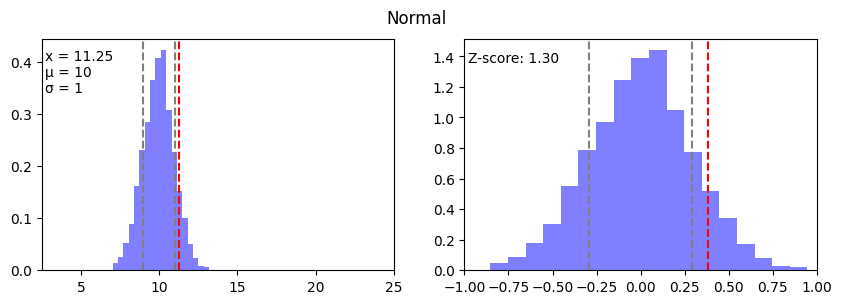

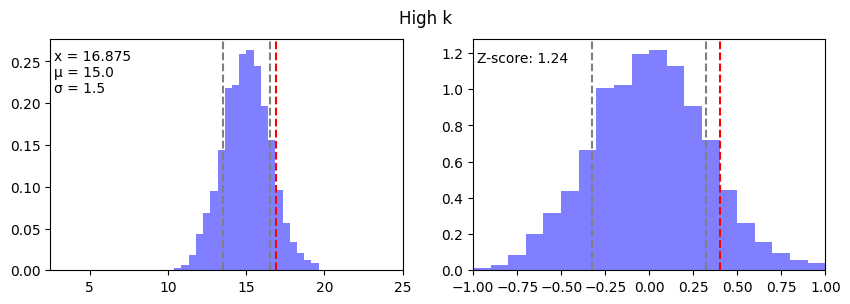

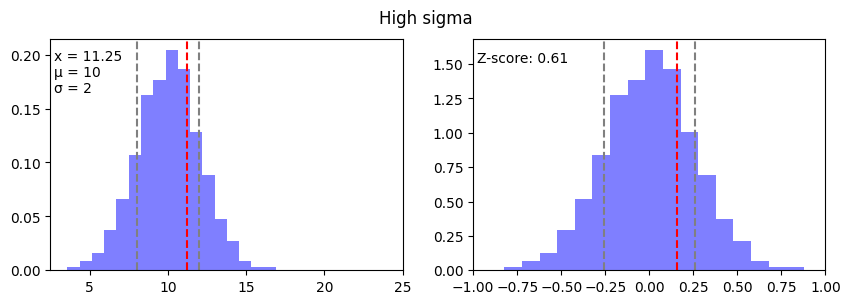

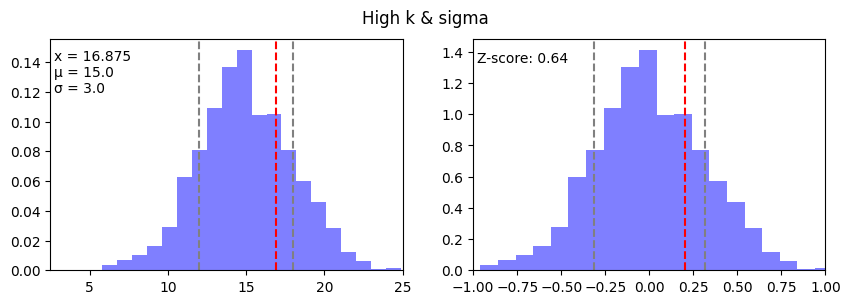

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Params for normal distribution
mu0 = 10
sigma0 = 1
d0 = 1.25
x0 = mu0 + d0
k0 = 1

# Params for altered distributions
k1 = 1.5
sigma1 = 2

# Generate distributions
rng = np.random.default_rng(42) ## seed
gauss0 = rng.normal(loc=mu0*k0, scale=sigma0*k0, size=2000)
high_k = rng.normal(loc=mu0*k1, scale=sigma0*k1, size=2000)
high_sigma = rng.normal(loc=mu0*k0, scale=sigma1*k0, size=2000)
high_k_high_sigma = rng.normal(loc=mu0*k1, scale=sigma1*k1, size=2000)

def get_zscore(x, gauss):
    return (x - gauss.mean()) / gauss.std()
def scale_2tail(x, gauss): ## scale between -1 & 1
    x = (x - gauss.mean()) / ((gauss.max() - gauss.min()) /2)
    gauss = (gauss - gauss.mean()) / ((gauss.max() - gauss.min()) /2)
    return (x, gauss)

def hist(gauss, x, mu, sigma, title):
    fig, ax = plt.subplots(1,2, figsize=(10,3))
    plt.suptitle(title)
    ## Original distribution
    ax[0].hist(gauss, bins=20, density=True, alpha=0.5, color='b')
    ax[0].axvline(x=x, color='r', linestyle='--')
    ax[0].axvline(x=mu+sigma, color='gray', linestyle='--')
    ax[0].axvline(x=mu-sigma, color='gray', linestyle='--')
    ax[0].text(.01,.7, f'x = {x}\nμ = {mu}\nσ = {sigma}\n', transform=ax[0].transAxes)
    ax[0].set_xlim(2.5, 25)
    ## Scaled distribution
    x_scaled, gauss_scaled = scale_2tail(x, gauss)
    z_score = get_zscore(x, gauss)
    ax[1].hist(gauss_scaled, bins=20, density=True, alpha=0.5, color='b')
    ax[1].axvline(x=x_scaled, color='r', linestyle='--')
    ax[1].axvline(x=gauss_scaled.mean()+gauss_scaled.std(), color='gray', linestyle='--')
    ax[1].axvline(x=gauss_scaled.mean()-gauss_scaled.std(), color='gray', linestyle='--')
    ax[1].text(.01,.9, f'Z-score: {z_score:.2f}', transform=ax[1].transAxes)
    ax[1].set_xlim(-1, 1)
    plt.show()

hist(gauss0, x0, mu0, sigma0, 'Normal')
hist(high_k, x0*k1, mu0*k1, sigma0*k1, 'High k')
hist(high_sigma, x0, mu0, sigma1, 'High sigma')
hist(high_k_high_sigma, x0*k1, mu0*k1, sigma1*k1, 'High k & sigma')

Conclusions:
- _k_ does not affect the z-score, but sigma does
Open question:
- Why does 2D have lower z-scores?
    - It might affect sigma 
    - Why does it not affect _k_? Or is _k_ not correctly implemented/thought through here?